# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [5]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


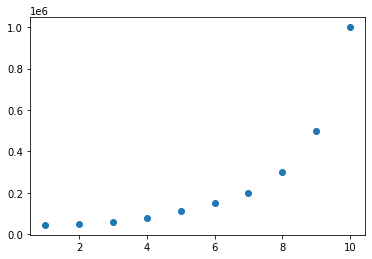

In [9]:
plt.scatter(x= df["Level"], y=df["Salary"])

In [10]:
x = df.iloc[:, 1].values.reshape(-1,1)
y = df.iloc[:, -1]

In [11]:
x.shape, y.shape

((10, 1), (10,))

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [42]:
from sklearn.preprocessing import PolynomialFeatures
model2 = PolynomialFeatures(degree = 5)

In [43]:
x_poly = model2.fit_transform(x)
x_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [44]:
model3 = LinearRegression()
model3.fit(x_poly, y)

LinearRegression()

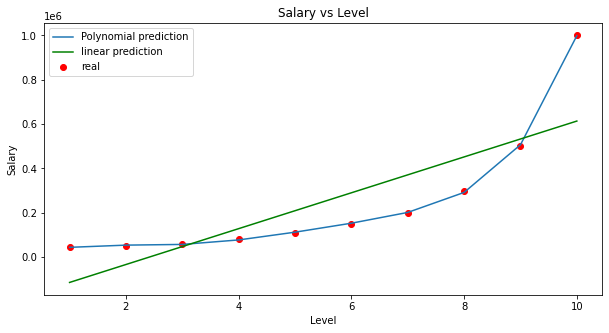

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(x= df["Level"], y=df["Salary"], color = "red", label="real")
plt.plot(x, model3.predict(x_poly), label="Polynomial prediction")
plt.plot(x, model.predict(x), color="green", label="linear prediction")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary vs Level")
plt.legend()
plt.show()

In [30]:
y.astype("float64")

0      45000.0
1      50000.0
2      60000.0
3      80000.0
4     110000.0
5     150000.0
6     200000.0
7     300000.0
8     500000.0
9    1000000.0
Name: Salary, dtype: float64

In [59]:
x_grid = np.arange(min(x), max(x)+.1, .1).reshape(-1,1)
x_grid.shape

(91, 1)

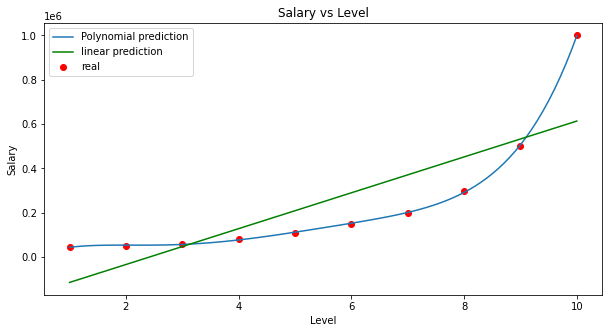

In [60]:
plt.figure(figsize=(10,5))
plt.scatter(x= df["Level"], y=df["Salary"], color = "red", label="real")
plt.plot(x_grid, model3.predict(model2.fit_transform(x_grid)), label="Polynomial prediction")
plt.plot(x, model.predict(x), color="green", label="linear prediction")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary vs Level")
plt.legend()
plt.show()

In [71]:
sample = 6.5
sample = np.array(sample).reshape(-1,1)
model.predict(sample), model3.predict(model2.fit_transform(sample))

(array([330378.78787879]), array([174878.07765173]))